In [1]:
import ee
ee.Authenticate()
ee.Initialize(project='ee-mmasadar')
import geopandas as gpd
from shapely.geometry import shape
from datetime import date
import datetime
# from scipy.interpolate import CubicSpline
import scipy.interpolate as interpolate
import geemap

In [2]:
def addNDVI(attr):
    ndvi=(attr['B8']-attr['B4'])/(attr['B8']+attr['B4'])    
    return ndvi

# Function to iterate over image collection, returning a pandas dataframe
def extract_band_values(img_coll, day0, pts):
    ID =img_coll.aggregate_array('system:id').getInfo()
    T=img_coll.aggregate_array('system:time_start').getInfo()
  
    dictarr = []
    for img_id, time in zip(ID,T):            
            image = ee.Image(img_id)

            fc_image_red = image.reduceRegions(collection=pts,
                                        reducer=ee.Reducer.mean(),
                                        scale=30)

            features = fc_image_red.getInfo()['features']            
            time=date.fromtimestamp(time/1000)
            for f in features:
                # Store all attributes in a dict
                attr = f['properties'] 
                str_attrB8=f"{attr['B8']}"
                str_attrB4=f"{attr['B4']}"

                # if str_attrB8=='None':
                    # print(str_attrB8)
                
                if str_attrB8!='None' and str_attrB4 !='None' :
                    # print(attr['B8'],attr['B4'])
                    # attr = f['properties'] 
                    
                    attr['ndvi']=addNDVI(attr)
                    # and treat geometry separately
                    attr['point'] = f['geometry']['coordinates']  # GeoJSON Feature!
                    attr['date']=time
                    attr['day']=attr['date']-day0   
                    attr['img_id']=img_id
                    # print(attr['day'])                 
                    # attr['ndvi']=addNDVI(attr)
                    # attr['image_id']=img_id
                    dictarr.append(attr)

    # print('after loop')
    df = gpd.GeoDataFrame(dictarr)

    return df
# ==========================================================================

In [3]:
def geemap_longlat_reverse(LL):
    for r in LL:
        print([r[1],r[0]])

In [4]:
#PAKIS
pakis_polygon = ee.Geometry.Polygon([
  [
    [112.71385441522641,-7.9601534555133],
    [112.71384100418133,-7.960259710095748],
    [112.71391074161572,-7.9603739337411366],
    [112.71376053791089,-7.960512064618619],
    [112.71374712686581,-7.960634257279103],
    [112.71391878824276,-7.960788326233871],
    [112.7141601870541,-7.960307524648849],
    [112.713961703587,-7.960177362796752],
    [112.71385441522641,-7.9601534555133]
  ],
])

robyong_polygon = ee.Geometry.Polygon([
  [112.72961522785975,-8.021983406253803],
  [112.72958438245608,-8.022081676855173],
  [112.72961120454623,-8.022092300702552],
  [112.72961388675525,-8.022112220415622],
  [112.72958170024707,-8.02211753233895],
  [112.72956024257495,-8.022187915316406],
  [112.72970508186175,-8.022211818966369],
  [112.72971715180232,-8.022154715800259],
  [112.72974531499698,-8.022149403877428],
  [112.72977213708712,-8.022085660797966],
  [112.72975470272853,-8.022033869538545],
  [112.72979091255023,-8.022016605783945],
  [112.72961522785975,-8.021983406253803]
  ])

pakis_bunut_pol=ee.Geometry.Polygon([
    [112.72134524790562,-7.9375956376454235],
  [112.72545190032606,-7.937302509781132],
  [112.72311538548576,-7.932362367965742],
  [112.72166088144552,-7.931509387976429],
  [112.72034034488266,-7.9313261550071354],
  [112.72052534746157,-7.932539282136221],
  [112.71987464828565,-7.933765042346965]
])

pakis_tol =ee.Geometry.Polygon([
    [112.69361257553102,-7.947291612389013], 
  [112.6962733268738,-7.948099171853668],
  [112.6960587501526,-7.948864226722686],
  [112.69554376602174,-7.948396693361106],
  [112.694149017334,-7.948375441832022],
  [112.69406318664552,-7.948014165669061],
  [112.6930332183838,-7.94790790791354]
])

pakis_point1 = ee.Geometry.Point([112.71454453468323,-7.960045022038166])
pakis_point2 = ee.Geometry.Point([112.71426290273668,-7.960443476685707])
pakis_point3 = ee.Geometry.Point([112.70773708820343,-7.95900638176894])
pakis_point4 = ee.Geometry.Point([112.71041661500932,-7.959287957140382])

all_polygon=[[pakis_polygon,'Tebu Pakis'],
              [robyong_polygon,'Tebu Robyong'], 
              [pakis_bunut_pol,'Tebu Bunut'],
              [pakis_tol,'Unknown Pakis Tol'],
              [pakis_point1,'Non Tebu Pakis'],
              [pakis_point2,'Non Tebu Pakis2'],
              [pakis_point3,'Non Tebu Pakis3'],
              [pakis_point4,'Non Tebu Pakis4']]
list_centroid=[]
list_of_features=[]
for polygon in zip(all_polygon):
  print(polygon[0][1])
  list_of_features.append(ee.Feature(polygon[0][0], {'lokasi': polygon[0][1]}))
  list_centroid.append(polygon[0][0].centroid(maxError=1))

FColl = ee.FeatureCollection(list_of_features)

Tebu Pakis
Tebu Robyong
Tebu Bunut
Unknown Pakis Tol
Non Tebu Pakis
Non Tebu Pakis2
Non Tebu Pakis3
Non Tebu Pakis4


In [5]:
polygon_list=[row[0] for row in all_polygon] #column 0 only
lokasi_list=[row[1] for row in all_polygon] #column 1 only
print(polygon_list)
print(lokasi_list)

[ee.Geometry({
  "functionInvocationValue": {
    "functionName": "GeometryConstructors.Polygon",
    "arguments": {
      "coordinates": {
        "constantValue": [
          [
            [
              112.71385441522641,
              -7.9601534555133
            ],
            [
              112.71384100418133,
              -7.960259710095748
            ],
            [
              112.71391074161572,
              -7.9603739337411366
            ],
            [
              112.71376053791089,
              -7.960512064618619
            ],
            [
              112.71374712686581,
              -7.960634257279103
            ],
            [
              112.71391878824276,
              -7.960788326233871
            ],
            [
              112.7141601870541,
              -7.960307524648849
            ],
            [
              112.713961703587,
              -7.960177362796752
            ],
            [
              112.71385441522641,
         

In [7]:
import pandas as pd

#Ambil data mentah dari server, INI LUAMAAA 
startyear = 2019
day0=date(startyear-1, 12, 31)
endyear = 2023
startDate = ee.Date.fromYMD(startyear,1,1)
endDate = ee.Date.fromYMD(endyear,12,31)
#### Load Raster
ImgColl =(ee.ImageCollection("COPERNICUS/S2_SR_HARMONIZED")
          .filterDate(startDate,endDate)
          .filterBounds(FColl)) 
idx=10
df_all = extract_band_values(ImgColl,day0,FColl)

In [ ]:
# Simpan ke file agar bisa dipakai lagi ...biar lebih cepat 
df_all.to_excel('2019_2023_datasatelit.xlsx')
# df_all.to_excel('2022_2023_datasatelit.xlsx')

In [11]:
import pandas as pd

# Read the Excel file using openpyxl
df = pd.read_excel('2019_2023_datasatelit.xlsx', engine='openpyxl')

# Show the DataFrame
print(df)

      Unnamed: 0         AOT           B1          B11          B12  \
0              0  134.000000  6727.163399  4084.161220  3510.912854   
1              1  133.000000  4955.000000  3359.270270  3128.837838   
2              2  133.278680  6548.485194  4732.767154  4301.186672   
3              3  134.000000  7824.990937  4855.717439  4211.899430   
4              4  134.000000  6739.000000  3939.000000  3366.000000   
...          ...         ...          ...          ...          ...   
2908        2908  323.026312   499.580325  1924.373191   910.081859   
2909        2909  328.000000  1063.000000  2449.000000  2153.000000   
2910        2910  328.000000   979.000000  2296.000000  1757.000000   
2911        2911  328.000000   654.000000  2072.000000  1634.000000   
2912        2912  328.000000   773.000000  1045.000000   759.000000   

               B2           B3           B4           B5           B6  ...  \
0     6505.703704  6100.917211  5737.326797  6163.599129  5868.163399

In [12]:
#Ekstrak data feature lokasi dan nama lokasi
polygon_list=[row[0] for row in all_polygon] #column 0 only => Polygon lokasi
lokasi_list=[row[1] for row in all_polygon] #column 1 only => NAMA LOKASI

for lok in lokasi_list:
    print(lok)
# polygon_list

Tebu Pakis
Tebu Robyong
Tebu Bunut
Unknown Pakis Tol
Non Tebu Pakis
Non Tebu Pakis2
Non Tebu Pakis3
Non Tebu Pakis4


In [19]:
# Menyusun ULANG Data per lokasi per tahun per bulan ... 
tgl_max_=[]
tgl_min_=[]
ndvi_max_=[]
ndvi_min_=[]
ndvi_avg_=[]
img_id_min=[]
img_id_max=[]
lok=[]
bln=[]

# list_tahun=[2019,2020,2021,2022,2023]
list_tahun=[2022,2023]


for lokasi in lokasi_list: #['Tebu Pakis','Tebu Bunut','Tebu Robyong','Non Tebu']:
    # print(lokasi)
    df_=df_all[df_all['lokasi']==lokasi]
    for tahun in list_tahun:
        for bulan in range(1,13):
            ndvi_temp=[]
            tgl_temp=[]
            img_id_temp=[]
            for img_id,tgl,ndvi in zip(df_['img_id'],df_['date'],df_['ndvi']):
                if int(tgl.strftime("%Y"))==tahun and int(tgl.strftime("%m"))==bulan:
                    ndvi_temp.append(ndvi)
                    tgl_temp.append(tgl)
                    img_id_temp.append(img_id)

            # print(bulan,max(ndvi_temp))
            max_index = pd.Series(ndvi_temp).idxmax()
            min_index = pd.Series(ndvi_temp).idxmin()
            # print(tgl_temp[max_index],bulan, max_index,max(ndvi_temp))
            # print(ndvi_temp)
            # print(tgl_temp)
            tgl_max_.append(tgl_temp[max_index])
            tgl_min_.append(tgl_temp[min_index])
            ndvi_max_.append(max(ndvi_temp))
            ndvi_min_.append(min(ndvi_temp))            
            img_id_max.append(img_id_temp[max_index])
            img_id_min.append(img_id_temp[min_index])
            ndvi_avg_.append(sum(ndvi_temp)/len(ndvi_temp))
            lok.append(lokasi)
            bln.append(bulan)
            

    dict_data={
        'lokasi':lok,
        'bulan':bln,
        'ndvi_avg':ndvi_avg_,
        'ndvi_min':ndvi_min_,
        'ndvi_max':ndvi_max_,
        'tanggal_min':tgl_min_,
        'tanggal_max':tgl_max_,
        'img_id_max':img_id_max,
        'img_id_min':img_id_min,
    }

new_df=pd.DataFrame(dict_data)
new_df.iloc[0:-1]
# new_df


    # if int(tgl.strftime("%m"))>4 and int(tgl.strftime("%m"))<7 and int(tgl.strftime("%Y"))==2021 and ndvi < 0.3:
    #     # print(tgl,img_id,ndvi)
    #     print(tgl.strftime("%Y-%m-%d"),ndvi)

,lokasi,bulan,ndvi_avg,ndvi_min,ndvi_max,tanggal_min,tanggal_max,img_id_max,img_id_min
0,Tebu Pakis,1,0.439599,0.084387,0.708408,2022-01-15,2022-01-10,COPERNICUS/S2_SR_HARMONIZED/20220110T023101_20...,COPERNICUS/S2_SR_HARMONIZED/20220115T023039_20...
1,Tebu Pakis,2,0.371932,0.033804,0.902005,2022-02-14,2022-02-19,COPERNICUS/S2_SR_HARMONIZED/20220219T022741_20...,COPERNICUS/S2_SR_HARMONIZED/20220214T022759_20...
2,Tebu Pakis,3,0.425449,0.089527,0.733566,2022-03-01,2022-03-31,COPERNICUS/S2_SR_HARMONIZED/20220331T022551_20...,COPERNICUS/S2_SR_HARMONIZED/20220301T022631_20...
3,Tebu Pakis,4,0.386798,-0.036516,0.784065,2022-04-30,2022-04-05,COPERNICUS/S2_SR_HARMONIZED/20220405T022549_20...,COPERNICUS/S2_SR_HARMONIZED/20220430T022551_20...
4,Tebu Pakis,5,0.542461,0.349800,0.807480,2022-05-25,2022-05-30,COPERNICUS/S2_SR_HARMONIZED/20220530T022601_20...,COPERNICUS/S2_SR_HARMONIZED/20220525T022549_20...
...,...,...,...,...,...,...,...,...,...
186,Non Tebu Pakis4,7,0.386659,-0.061583,0.631336,2023-07-14,2023-07-19,COPERNICUS/S2_SR_HARMONIZED/20230719T022539_20...,COPERNICUS/S2_SR_HARMONIZED/20230714T022541_20...
187,Non Tebu Pakis4,8,0.265969,0.083467,0.388235,2023-08-23,2023-08-28,COPERNICUS/S2_SR_HARMONIZED/20230828T022539_20...,COPERNICUS/S2_SR_HARMONIZED/20230823T022541_20...
188,Non Tebu Pakis4,9,0.458862,-0.021424,0.764738,2023-09-07,2023-09-22,COPERNICUS/S2_SR_HARMONIZED/20230922T022531_20...,COPERNICUS/S2_SR_HARMONIZED/20230907T022539_20...
189,Non Tebu Pakis4,10,0.713691,0.655307,0.786325,2023-10-27,2023-10-02,COPERNICUS/S2_SR_HARMONIZED/20231002T022531_20...,COPERNICUS/S2_SR_HARMONIZED/20231027T022809_20...


Tebu Pakis


AttributeError: Can only use .dt accessor with datetimelike values

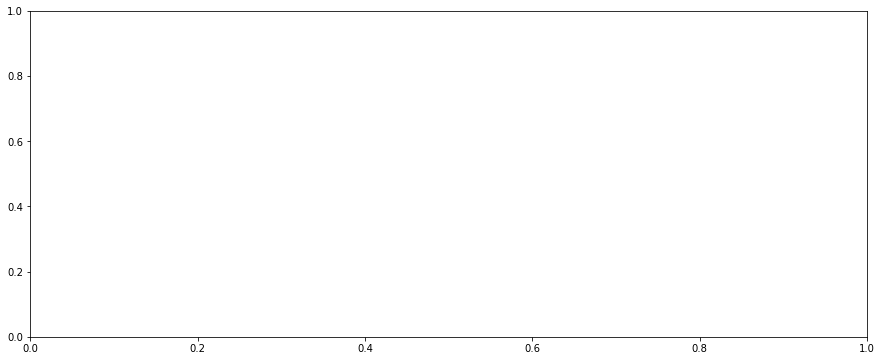

In [14]:
#Plot data ndvi semua lokasi 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import (YEARLY, DateFormatter,
                              rrulewrapper, RRuleLocator, drange)
formatter = DateFormatter('%m/%d/%y')
fig, ax = plt.subplots(figsize=(15, 6))
# plt.plot_date(d,y)
tahun=2022
for lokasi in lokasi_list: 
    #['Tebu Pakis','Tebu Bunut','Tebu Robyong','Non Tebu']:
    print(lokasi)
    data_plt=new_df[new_df['lokasi']==lokasi][['lokasi','bulan','tanggal_min','ndvi_min','tanggal_max','ndvi_max','ndvi_avg']]
    data_plt=data_plt[data_plt['tanggal_max'].dt.year==tahun]
    
    #Sumbux dibuat per bulan 
    d=data_plt['tanggal_max'].dt.month #SUMBU x

    #Sumbu y ambil salah satu ndvi saja dalam satu bulan
    y=data_plt['ndvi_max']
    if 'Non' in lokasi:
        plt.plot(d,y,'-x',label='line with marker')    
    else:
        plt.plot(d,y,'-o',label='line with marker')    

plt.legend(lokasi_list,loc="upper right")
plt.show()

Tebu Pakis
        lokasi  bulan tanggal_min  ndvi_min tanggal_max  ndvi_max  ndvi_avg
0   Tebu Pakis      1  2022-01-15  0.084387  2022-01-10  0.708408  0.439599
1   Tebu Pakis      2  2022-02-14  0.033804  2022-02-19  0.902005  0.371932
2   Tebu Pakis      3  2022-03-01  0.089527  2022-03-31  0.733566  0.425449
3   Tebu Pakis      4  2022-04-30 -0.036516  2022-04-05  0.784065  0.386798
4   Tebu Pakis      5  2022-05-25  0.349800  2022-05-30  0.807480  0.542461
5   Tebu Pakis      6  2022-06-09  0.159572  2022-06-29  0.787903  0.597244
6   Tebu Pakis      7  2022-07-14  0.037695  2022-07-04  0.796840  0.595379
7   Tebu Pakis      8  2022-08-28  0.002865  2022-08-18  0.695174  0.444258
8   Tebu Pakis      9  2022-09-07  0.091165  2022-09-02  0.312605  0.220590
9   Tebu Pakis     10  2022-10-17 -0.011113  2022-10-22  0.513207  0.237411
10  Tebu Pakis     11  2022-11-11 -0.008317  2022-11-21  0.622262  0.230706
11  Tebu Pakis     12  2022-12-16  0.071910  2022-12-06  0.781277  0.448574
1

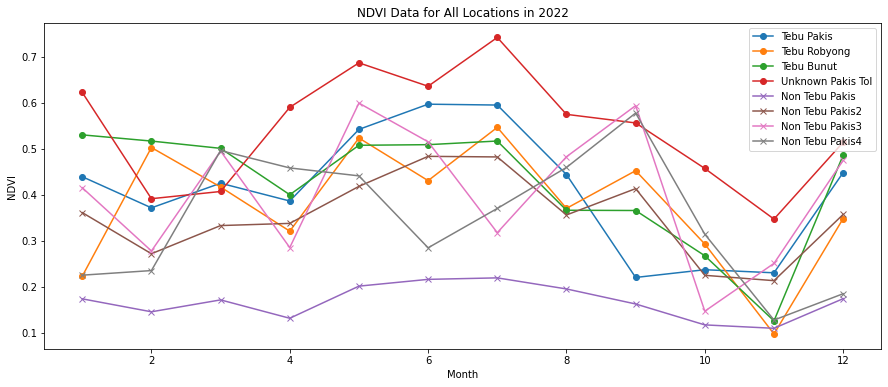

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.dates import DateFormatter

# Assuming 'new_df' is your DataFrame and 'lokasi_list' is the list of locations
# Ensure 'tanggal_max' is in datetime format
new_df['tanggal_max'] = pd.to_datetime(new_df['tanggal_max'])

formatter = DateFormatter('%m/%d/%y')


tahun = 2022
fig, ax = plt.subplots(figsize=(15, 6))

for lokasi in lokasi_list:
    print(lokasi)
    data_plt = new_df[new_df['lokasi'] == lokasi][['lokasi', 'bulan', 'tanggal_min', 'ndvi_min', 'tanggal_max', 'ndvi_max', 'ndvi_avg']]
    data_plt = data_plt[data_plt['tanggal_max'].dt.year == tahun]

    # Sumbu x dibuat per bulan
    d = data_plt['tanggal_max'].dt.month  # SUMBU x

    # Sumbu y ambil salah satu ndvi saja dalam satu bulan
    y = data_plt['ndvi_avg']  # Assuming you want to plot 'ndvi_avg'

    if 'Non' in lokasi:
        plt.plot(d, y, '-x', label=lokasi)
    else:
        plt.plot(d, y, '-o', label=lokasi)

plt.legend(loc="upper right")
plt.xlabel('Month')
plt.ylabel('NDVI')
plt.title('NDVI Data for All Locations in 2022')
plt.show()


In [28]:
lokasi_list

array(['Tebu Pakis', 'Tebu Robyong', 'Tebu Bunut', 'Unknown Pakis Tol',
       'Non Tebu Pakis', 'Non Tebu Pakis2', 'Non Tebu Pakis3',
       'Non Tebu Pakis4'], dtype=object)

In [31]:
import pandas as pd
import ee

# Assuming you have the necessary Google Earth Engine (GEE) initialization
# ee.Initialize()

# Ensure 'date' column in df_all is in datetime format
df_all['date'] = pd.to_datetime(df_all['date'])

# Parameters
bulan = 9
tahun = 2022
index = 0

# Selection of location and its centroid
lokasi = lokasi_list[index]
lokasi_centroid = list_centroid[index].coordinates().getInfo()
print(lokasi, lokasi_centroid)

# Filter data for the specific location, year, and month
df_cek = df_all[df_all['lokasi'] == lokasi]
df_cek = df_cek[df_cek['date'].dt.year == tahun]
df_cek = df_cek[df_cek['date'].dt.month == bulan]

# Get the index of the row with the maximum NDVI
idxmax = df_cek['ndvi'].idxmax()

# Display the filtered DataFrame
#print(df_cek[['lokasi', 'date', 'img_id', 'ndvi']])

# Collect images with the maximum NDVI
img_coll_ = []
for img_id, idx in zip(df_cek['img_id'], df_cek.index): 
    if idx == idxmax:
        img_coll_.append(ee.Image(img_id))

ImgC = ee.ImageCollection(img_coll_)

# Display the filtered DataFrame
df_cek[['lokasi', 'date', 'img_id', 'ndvi']]

Tebu Pakis [112.71393964478037, -7.9604557566623875]


,lokasi,date,img_id,ndvi
2137,Tebu Pakis,2022-09-02,COPERNICUS/S2_SR_HARMONIZED/20220902T022529_20...,0.312605
2145,Tebu Pakis,2022-09-07,COPERNICUS/S2_SR_HARMONIZED/20220907T022541_20...,0.091165
2153,Tebu Pakis,2022-09-12,COPERNICUS/S2_SR_HARMONIZED/20220912T022529_20...,0.277108
2161,Tebu Pakis,2022-09-17,COPERNICUS/S2_SR_HARMONIZED/20220917T022541_20...,0.249737
2169,Tebu Pakis,2022-09-22,COPERNICUS/S2_SR_HARMONIZED/20220922T022529_20...,0.229239
2177,Tebu Pakis,2022-09-27,COPERNICUS/S2_SR_HARMONIZED/20220927T022541_20...,0.163685


In [ ]:
# geemap.update_package()

In [83]:
#Membuat MAP 

import ipywidgets as widgets
from ipyleaflet import WidgetControl

def mask_s2_clouds(image):
  """Masks clouds in a Sentinel-2 image using the QA band.

  Args:
      image (ee.Image): A Sentinel-2 image.

  Returns:
      ee.Image: A cloud-masked Sentinel-2 image.
  """
  qa = image.select('QA60')

  # Bits 10 and 11 are clouds and cirrus, respectively.
  cloud_bit_mask = 1 << 10
  cirrus_bit_mask = 1 << 11

  # Both flags should be set to zero, indicating clear conditions.
  mask = (
      qa.bitwiseAnd(cloud_bit_mask)
      .eq(0)
      .And(qa.bitwiseAnd(cirrus_bit_mask).eq(0))
  )

  return image.updateMask(mask).divide(10000)

dataset=ImgC.map(mask_s2_clouds)
# dataset =(
#         ee.ImageCollection("LANDSAT/LC08/C02/T1_TOA") 
#         # COPERNICUS/S2_SR_HARMONIZED
#         # LANDSAT/LC08/C02/T1_TOA
#           .filterDate('2023-01-01', '2023-12-31')
#         #   .filter(ee.Filter.lt('CLOUDY_PIXEL_PERCENTAGE', 18))
#         #   .filterBounds(polygon)
#         .map(mask_s2_clouds)
#           ) 

visualization = {
    'min': 0.0,
    'max': 0.3,
    'bands': ['B4', 'B3', 'B2'],
}

m = geemap.Map(width='800px',height='500px')

# Create a feature group to hold the labels
label_layer = geemap.feature_group(name='Labels')

# Add labels to the feature group
for feature in FColl.getInfo()['features']:
    lon, lat = feature['geometry']['coordinates']
    label = geemap.Marker(location=(lat, lon), draggable=False)
    label_layer.add_layer(label)

# Add the feature group to the map
m.add_layer(label_layer)

#Interaktif klik menjadi lon dan lat****************************
#**************menampilkan koordinat hasil klik****************
m.points=[]
# Add an output widget to the map
output_widget = widgets.Output(layout={'border': '1px solid black'})
output_control = WidgetControl(widget=output_widget, position='bottomright')
m.add_control(output_control)
# Capture user interaction with the map
def handle_interaction(**kwargs):
    latlon = kwargs.get('coordinates')
    if kwargs.get('type') == 'click':
        m.default_style = {'cursor': 'wait'}
        # xy = ee.Geometry.Point(latlon[::-1])

        with output_widget:
            output_widget.clear_output()
            print(latlon)
        m.points.append(latlon)
    m.default_style = {'cursor': 'pointer'}
m.on_interaction(handle_interaction)
#******************************************************

# m.set_center(112.72,-7.93,15)
m.set_center(float(lokasi_centroid[0]),float(lokasi_centroid[1]),16)
m.add_basemap('Esri.WorldImagery')

m.add_layer(geemap.ee_tile_layer(dataset, visualization, 'COPERNICUS/S2_SR_HARMONIZED'))
m.add_layer(geemap.ee_tile_layer(FColl, {'color': 'red', 'fillOpacity': 0, 'opacity': 1.0}, 'Area of Interest'))

#m.add_labels(FColl,'lokasi', font_size="8pt", font_color="yellow", font_family="arial", font_weight="italic",) 
#m.add_labels(FColl, 'lokasi', font_size="8pt", font_color="yellow", font_family="arial", font_weight="italic")

m

AttributeError: module 'geemap' has no attribute 'feature_group'

In [87]:
import geemap

print(geemap.__version__)

0.9.2


In [80]:
#Koordinat lokasi pada posisi yang diklik oleh mouse
m.points

[]

In [ ]:
# import time
# import datetime
# string = "20/01/2020"
# print(time.mktime(datetime.datetime.strptime(string,"%d/%m/%Y").timetuple()))

In [ ]:
# plot=df['ndvi'].plot()
# df.plot(kind='scatter',x='date',y='ndvi')
# df.plot(kind='scatter',x='date',y='ndvi')
# df.plot(kind='bar',x='date',y='ndvi',figsize=(10,6))
# df.plot(kind='bar',x='day',y='ndvi',figsize=(15,6),ylabel='NDVI')
